In [1]:
import pandas as pd

vol = pd.read_csv('./data/original/vol.csv')
vol2 = pd.read_csv('./data/original/vol2.csv')
visual = pd.read_csv('./data/original/visual.csv')
visual2 = pd.read_csv('./data/original/visual2.csv')

In [2]:
vol = vol.drop(vol.columns[-9:], axis=1)
visual = visual.drop(visual.columns[-2:], axis=1)

In [3]:
# sort rows a-z by certain column
vol = vol.sort_values(by='ID')
vol2 = vol2.sort_values(by='ID')
visual = visual.sort_values(by='ID')
visual2 = visual2.sort_values(by='ID')

In [4]:
# replace all NaN with 0 and "x" with 1
visual2 = visual2.replace({'x': 1, float('nan'): 0})

In [5]:
visual.head()

,ID,PCA,thalamus,cerebellum,pons,midbrain,side
65,003aa3e8,0,1,0,0,0,L
355,0214eb85,0,0,1,0,0,R
335,035bf9fe,0,0,1,0,0,L
253,037cfba0,0,0,0,1,0,L
67,0559cdbf,0,1,0,0,1,L


In [6]:
visual2.head()

,ID,PCAL,PCAR,ThalamusL,ThalamusR,cerebellumL,cerebellumR,pons,midbrain
51,sub-00223b5a,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0,sub-003d54e0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,sub-00f0ea23,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sub-01b2897a,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55,sub-0522f021,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [7]:
# add to visual the following columns: PCAL	PCAR	ThalamusL	ThalamusR	cerebellumL	cerebellumR
visual['PCAL'] = 0
visual['PCAR'] = 0
visual['thalamusL'] = 0
visual['thalamusR'] = 0
visual['cerebellumL'] = 0
visual['cerebellumR'] = 0

In [8]:
#if PCA is 1, and side is L, then PCAL is 1
# if PCA is 1, and side is R, then PCA R is 1
# if Thalamus is 1, and side is L, then ThalamusL is 1
# if Thalamus is 1, and side is R, then ThalamusR is 1
# if cerebellum is 1, and side is L, then cerebellumL is 1
# if cerebellum is 1, and side is R, then cerebellumR is 1

visual.loc[(visual['PCA'] == 1) & (visual['side'] == 'L'), 'PCAL'] = 1
visual.loc[(visual['PCA'] == 1) & (visual['side'] == 'R'), 'PCAR'] = 1
visual.loc[(visual['thalamus'] == 1) & (visual['side'] == 'L'), 'thalamusL'] = 1
visual.loc[(visual['thalamus'] == 1) & (visual['side'] == 'R'), 'thalamusR'] = 1
visual.loc[(visual['cerebellum'] == 1) & (visual['side'] == 'L'), 'cerebellumL'] = 1
visual.loc[(visual['cerebellum'] == 1) & (visual['side'] == 'R'), 'cerebellumR'] = 1

visual.head()

,ID,PCA,thalamus,cerebellum,pons,midbrain,side,PCAL,PCAR,thalamusL,thalamusR,cerebellumL,cerebellumR
65,003aa3e8,0,1,0,0,0,L,0,0,1,0,0,0
355,0214eb85,0,0,1,0,0,R,0,0,0,0,0,1
335,035bf9fe,0,0,1,0,0,L,0,0,0,0,1,0
253,037cfba0,0,0,0,1,0,L,0,0,0,0,0,0
67,0559cdbf,0,1,0,0,1,L,0,0,1,0,0,0


In [9]:
visual = visual.drop(columns=['side'])
visual = visual.drop(columns=['cerebellum'])
visual = visual.drop(columns=['thalamus'])
visual = visual.drop(columns=['PCA'])

In [10]:
visual.head()

,ID,pons,midbrain,PCAL,PCAR,thalamusL,thalamusR,cerebellumL,cerebellumR
65,003aa3e8,0,0,0,0,1,0,0,0
355,0214eb85,0,0,0,0,0,0,0,1
335,035bf9fe,0,0,0,0,0,0,1,0
253,037cfba0,1,0,0,0,0,0,0,0
67,0559cdbf,0,1,0,0,1,0,0,0


In [11]:
# move pons and midbrain columns to back
cols = list(visual.columns.values)
cols.pop(cols.index('pons'))
cols.pop(cols.index('midbrain'))
visual = visual[cols+['pons', 'midbrain']]
visual.head()

,ID,PCAL,PCAR,thalamusL,thalamusR,cerebellumL,cerebellumR,pons,midbrain
65,003aa3e8,0,0,1,0,0,0,0,0
355,0214eb85,0,0,0,0,0,1,0,0
335,035bf9fe,0,0,0,0,1,0,0,0
253,037cfba0,0,0,0,0,0,0,1,0
67,0559cdbf,0,0,1,0,0,0,0,1


In [12]:
# rename thalamusL as ThalamusL
visual = visual.rename(columns={'thalamusL': 'ThalamusL'})
visual = visual.rename(columns={'thalamusR': 'ThalamusR'})
visual.head()

,ID,PCAL,PCAR,ThalamusL,ThalamusR,cerebellumL,cerebellumR,pons,midbrain
65,003aa3e8,0,0,1,0,0,0,0,0
355,0214eb85,0,0,0,0,0,1,0,0
335,035bf9fe,0,0,0,0,1,0,0,0
253,037cfba0,0,0,0,0,0,0,1,0
67,0559cdbf,0,0,1,0,0,0,0,1


In [13]:
visual2.head()

,ID,PCAL,PCAR,ThalamusL,ThalamusR,cerebellumL,cerebellumR,pons,midbrain
51,sub-00223b5a,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0,sub-003d54e0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,sub-00f0ea23,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sub-01b2897a,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55,sub-0522f021,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
vol.head()

,ID,PCAL,PCAR,ThalamusL,ThalamusR,cerebellumR,cerebellumL,pons,midbrain
65,003aa3e8,0,0,401,0,0,0,0,0
355,0214eb85,0,0,0,0,0,3950,529,0
335,035bf9fe,0,0,0,0,3314,0,0,0
253,037cfba0,0,0,0,0,0,0,2277,0
67,0559cdbf,0,0,469,0,0,0,0,625


In [15]:
vol2.head()

,ID,PCAL,PCAR,ThalamusL,ThalamusR,cerebellumR,cerebellumL,pons,midbrain
0,sub-00223b5a,0,0,0,486,0,3958,970,0
1,sub-003d54e0,0,0,0,0,0,0,1847,278
2,sub-00f0ea23,3869,40235,0,0,0,81,0,0
3,sub-01b2897a,0,0,543,0,0,0,0,0
4,sub-0522f021,3932,55438,0,1683,0,1468,0,149


In [16]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

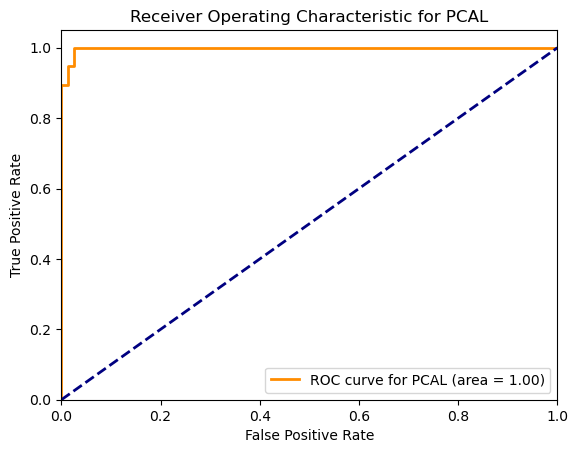

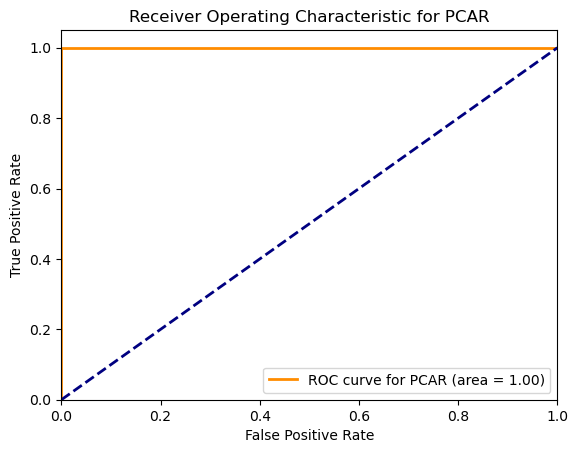

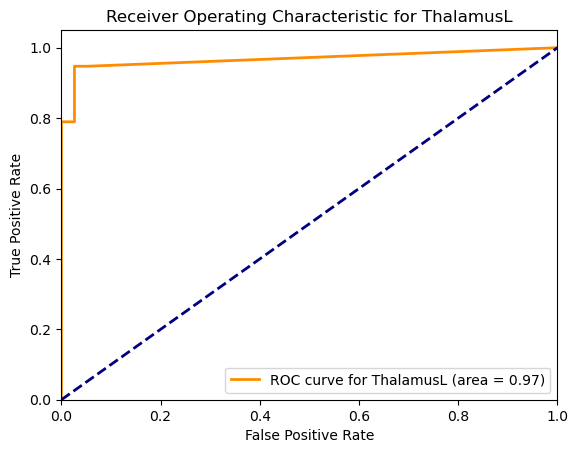

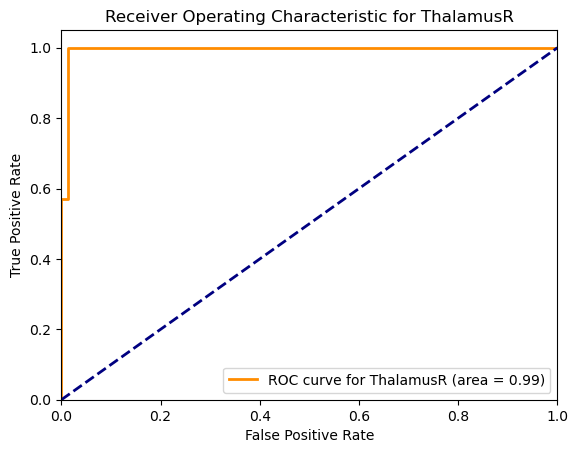

/Users/adikondepudi/miniforge3/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


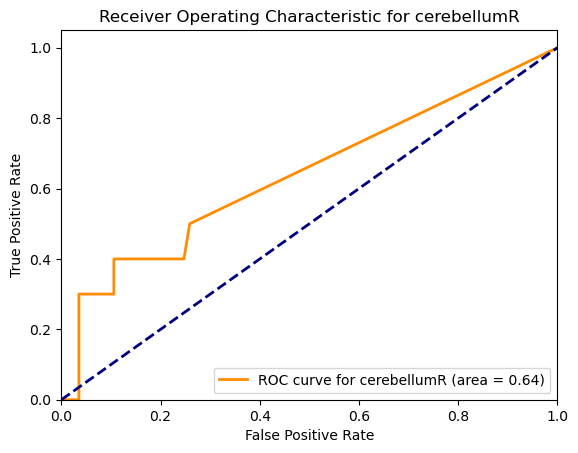

/Users/adikondepudi/miniforge3/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


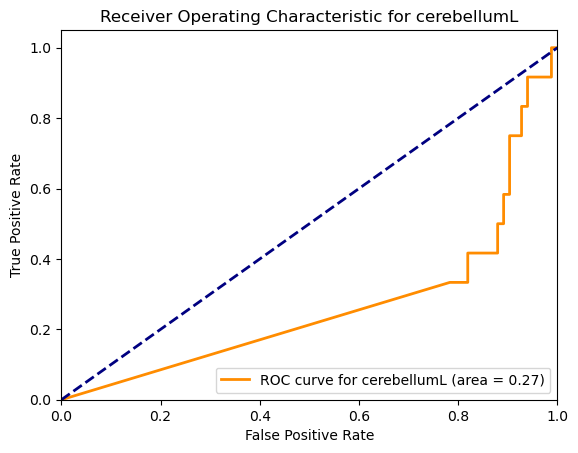

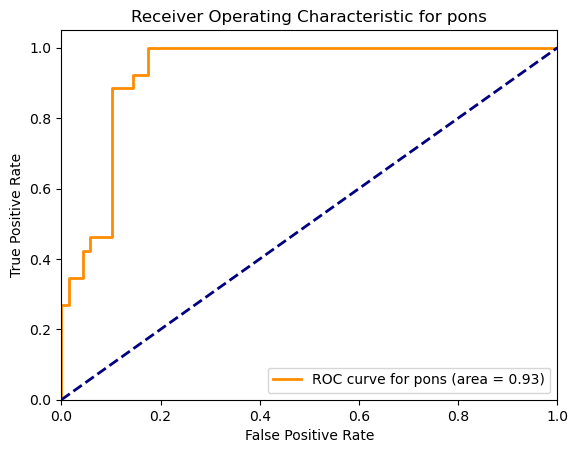

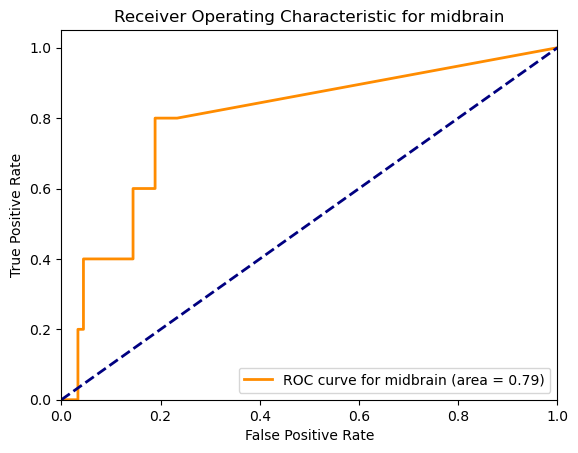

In [17]:
# Columns to process
columns = ['PCAL', 'PCAR', 'ThalamusL', 'ThalamusR', 'cerebellumR', 'cerebellumL', 'pons', 'midbrain']

# Initialize an empty DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Column', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Process each column
for col in columns:
    X1 = vol[col].values
    y1 = visual[col].values
    X2 = vol2[col].values
    y2 = visual2[col].values

    X = np.concatenate((X1, X2), axis=0).reshape(-1, 1)
    y = np.concatenate((y1, y2), axis=0)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

    # Train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities and calculate metrics
    probabilities = model.predict_proba(X_test)[:, 1]
    predictions = model.predict(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    roc_auc = auc(fpr, tpr)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    # Create a temporary DataFrame to hold the current column's metrics
    temp_df = pd.DataFrame({
        'Column': [col],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'AUC': [roc_auc]
    })

    # Append the temporary DataFrame to the main metrics DataFrame
    metrics_df = pd.concat([metrics_df, temp_df], ignore_index=True)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve for {col} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {col}')
    plt.legend(loc="lower right")
    plt.show()

In [18]:
metrics_df

,Column,Accuracy,Precision,Recall,F1 Score,AUC
0,PCAL,0.978947,0.947368,0.947368,0.947368,0.997922
1,PCAR,0.978947,1.000000,0.818182,0.900000,1.000000
2,ThalamusL,0.947368,0.937500,0.789474,0.857143,0.968144
3,ThalamusR,0.926316,0.888889,0.571429,0.695652,0.994709
4,cerebellumR,0.894737,0.000000,0.000000,0.000000,0.638824
5,cerebellumL,0.873684,0.000000,0.000000,0.000000,0.265060
6,pons,0.800000,0.769231,0.384615,0.512821,0.931438
7,midbrain,0.926316,0.333333,0.400000,0.363636,0.794444
